<a href="https://colab.research.google.com/github/VihangaPerera/ML/blob/main/AS2019489_ML_Final_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [501]:
##### Question 01 - KNN Model

In [502]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import seaborn 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

dataSet = pd.read_csv('Mobile_Dataset.csv')


In [503]:
#There are some coloumns, their values cannot be zero practically
dataSet[["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w"]]=dataSet[["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w"]]=dataSet[["battery_power","clock_speed","fc","int_memory","m_dep","mobile_wt","n_cores","pc","px_height","px_width","ram","sc_h","sc_w"]].replace(0,np.NAN)


In [504]:
print(dataSet.isnull().sum())

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc               474
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc               101
px_height          2
px_width           0
ram                0
sc_h               0
sc_w             180
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64


In [505]:
dataSet.fillna(dataSet.mean(),inplace=True)

In [506]:
print(dataSet.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [507]:
labelEncoder = LabelEncoder()

In [508]:
transformedData = dataSet.copy()

In [509]:
for data in dataSet:
    dataSet[data]=labelEncoder.fit_transform(dataSet[data])
    
    

In [510]:
dataSet


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,255,0,17,0,0,0,5,5,108,1,...,17,186,963,4,7,17,0,0,1,1
1,382,1,0,1,5,1,51,6,56,2,...,738,1099,998,12,2,5,1,1,0,2
2,48,1,0,1,1,1,39,8,65,4,...,962,901,984,6,1,7,1,1,0,2
3,88,1,20,0,5,0,8,7,51,5,...,935,954,1055,11,8,9,1,0,0,2
4,954,1,7,0,13,1,42,5,61,1,...,928,517,499,3,1,13,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,216,1,0,1,5,1,0,7,26,5,...,939,1022,180,8,3,17,1,1,0,0
1996,1064,1,21,1,5,0,37,1,107,3,...,745,1080,732,6,10,14,1,1,1,2
1997,1027,0,4,1,0,1,34,6,28,7,...,716,834,1158,4,0,3,1,1,0,3
1998,732,0,4,0,3,1,44,0,65,4,...,282,120,266,13,10,17,1,1,1,0


In [511]:
transformedData

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0000,0,7,0.6,188,2,...,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,5.6481,1,53,0.7,136,3,...,905.0,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0000,1,41,0.9,145,5,...,1263.0,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,5.6481,0,10,0.8,131,6,...,1216.0,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0000,1,44,0.6,141,2,...,1208.0,1212,1411,8,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,5.6481,1,2,0.8,106,6,...,1222.0,1890,668,13,4.0,19,1,1,0,0
1996,1965,1,2.6,1,5.6481,0,39,0.2,187,4,...,915.0,1965,2032,11,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0000,1,36,0.7,108,8,...,868.0,1632,3057,9,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0000,1,46,0.1,145,5,...,336.0,670,869,18,10.0,19,1,1,1,0


In [512]:
sum(dataSet.isnull().sum())
df = pd.DataFrame(dataSet)


X = transformedData.drop(['price_range'],axis=1)
Y = transformedData['price_range']

In [513]:
# Features which affect the price of a mobile
mobile_feature_list = list(X.columns)

In [514]:
mobile_feature_list

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [515]:
# We alocate data into training data set and testing data set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=41)

In [516]:
Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [517]:
Y_test

751     1
1545    2
881     2
396     3
509     2
       ..
1518    3
1398    0
1091    2
1390    2
783     0
Name: price_range, Length: 400, dtype: int64

In [518]:
X_train.shape

(1600, 20)

In [519]:
X_test.shape

(400, 20)

In [520]:
knnModel = KNeighborsClassifier(n_neighbors=7)
knnModel.fit(X_train, Y_train)
  
# Prediction of testing data set
prediction_Y =knnModel.predict(X_test)
print(prediction_Y)

[1 2 2 3 2 3 1 2 0 0 2 2 3 0 1 3 1 2 2 3 2 3 0 0 1 0 0 0 0 1 3 2 0 2 1 2 0
 1 0 0 1 2 1 2 3 1 3 2 1 0 2 2 2 2 1 1 3 3 3 1 0 3 2 0 2 3 1 1 0 1 1 0 2 0
 2 3 0 3 1 3 3 3 0 3 2 0 3 2 0 2 3 0 3 0 1 0 3 3 0 2 2 3 0 1 0 2 1 0 1 3 2
 0 2 3 3 0 0 1 3 3 2 3 0 2 2 2 1 1 0 1 2 3 2 0 3 1 3 0 1 2 1 1 1 0 0 3 0 1
 1 1 2 3 1 0 2 3 1 3 2 1 0 0 0 2 3 1 0 1 3 3 1 2 2 3 2 3 2 0 2 3 3 1 3 3 3
 2 0 2 0 0 0 0 2 3 2 2 3 3 1 1 1 3 1 2 1 1 1 1 0 0 1 1 2 0 3 2 3 3 0 1 0 0
 0 3 3 3 2 0 2 1 0 2 1 1 3 0 1 2 3 1 0 2 3 2 2 0 0 3 2 1 2 1 1 1 1 1 0 3 2
 3 3 0 0 1 0 3 0 2 1 3 1 2 2 0 0 3 0 1 1 2 3 0 0 3 3 1 3 3 3 1 1 0 1 3 2 0
 2 1 2 1 2 0 3 2 3 3 1 2 1 2 2 2 0 2 0 3 0 3 3 0 1 0 1 2 0 3 0 3 2 3 2 1 1
 3 3 1 1 0 2 3 2 1 3 0 3 1 0 3 1 0 2 0 2 2 3 3 0 2 2 2 2 1 2 1 3 1 2 0 2 3
 3 1 0 0 0 0 3 3 1 3 3 3 0 2 1 3 1 2 3 2 3 0 0 2 3 3 0 2 2 0]


In [521]:
accuracy = sm.accuracy_score(Y_test,prediction_Y)
print('Accuracy Score is ',str(accuracy))

Accuracy Score is  0.9425


In [522]:
# Analysis
print("Classification report :" , metrics.classification_report(prediction_Y,Y_test))

Classification report :               precision    recall  f1-score   support

           0       0.99      0.95      0.97       100
           1       0.91      0.96      0.93        94
           2       0.92      0.91      0.91       100
           3       0.95      0.95      0.95       106

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [523]:
confusionMatrix = confusion_matrix(Y_test,prediction_Y)

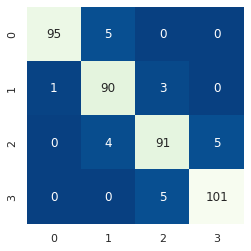

In [524]:
seaborn.set()
seaborn.heatmap(confusionMatrix.T,square=True,annot=True,fmt='d',cbar=False, cmap= "GnBu_r")

# Diagonal elements show the number of points which predicted label is equal to the true label

In [525]:
##### Question 02 - Multilayer Model

In [526]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np 
import matplotlib.pyplot as plt

In [527]:
dataFrame = pd.read_csv('Mobile_Dataset.csv')

In [528]:
dataFrame

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [529]:
values = dataFrame.values

In [530]:
values

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 0.000e+00,
        2.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 0.000e+00,
        3.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        3.000e+00]])

In [531]:
x = values[:,0:20]

In [532]:
y = values[:,20]

In [533]:
minMax_scaler = preprocessing.MinMaxScaler()
x_scale = minMax_scaler.fit_transform(x)

In [534]:
x_scale

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [535]:
y = dataFrame['price_range']

In [536]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [537]:
# We alocate data into training data set and testing data set and validation dat set
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale, y, test_size=0.2 , random_state=42)

In [538]:
x_val_and_test

array([[0.76486306, 0.        , 0.8       , ..., 1.        , 1.        ,
        0.        ],
       [0.45490982, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.98263193, 0.        , 0.96      , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.36272545, 0.        , 0.52      , ..., 1.        , 1.        ,
        1.        ],
       [0.15163661, 0.        , 0.88      , ..., 1.        , 1.        ,
        1.        ],
       [0.45691383, 0.        , 0.56      , ..., 1.        , 1.        ,
        1.        ]])

In [539]:
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5)

In [540]:
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1600, 20) (200, 20) (200, 20) (1600,) (200,) (200,)


In [541]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import SparseCategoricalCrossentropy
from keras.optimizers import Adam


model = Sequential([
 Dense(16, activation="relu", input_shape=(20,)),
 Dense(16,activation='relu'),
 Dense(4,activation='softmax')
])
model.compile(
   loss = SparseCategoricalCrossentropy(),
   optimizer = Adam(),
   metrics="accuracy")

In [542]:
# Fitting the Model
model.fit(x_train,y_train,validation_data=(x_val, y_val),epochs=50)

Epoch 1/50
50/50 [==============================] - 1s 10ms/step - loss: 1.3966 - accuracy: 0.2425 - val_loss: 1.3880 - val_accuracy: 0.2400
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 1.3596 - accuracy: 0.3219 - val_loss: 1.3432 - val_accuracy: 0.3900
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 1.3168 - accuracy: 0.3900 - val_loss: 1.3019 - val_accuracy: 0.4550
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 1.2614 - accuracy: 0.4294 - val_loss: 1.2247 - val_accuracy: 0.5000
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 1.1833 - accuracy: 0.4694 - val_loss: 1.1353 - val_accuracy: 0.5100
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 1.0912 - accuracy: 0.5113 - val_loss: 1.0350 - val_accuracy: 0.5850
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.9920 - accuracy: 0.5775 - val_loss: 0.9278 - val_accuracy: 0.6300
Epoch 8/50
50/50 [=

In [543]:
x_train.shape

(1600, 20)

In [544]:
# Model Evaluation
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.9300


[0.18886838853359222, 0.9300000071525574]

In [545]:
def predictionrelease(preds):
    arr=[]
    for i in range(0,len(preds)):
        ans=np.argmax(preds[i])
        arr.append(ans)
    len(arr)
    return arr

In [546]:
# Model Prediction
prediction_y = model.predict(x_test)      
prediction = predictionrelease(prediction_y)

7/7 [==============================] - 0s 2ms/step


In [547]:
# Analysis
print(classification_report(y_test,prediction)) 


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       0.94      0.96      0.95        50
           2       0.88      0.77      0.82        39
           3       0.89      0.94      0.91        51

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200



In [548]:
##### Comparison 

In [549]:
import matplotlib.pyplot as plt

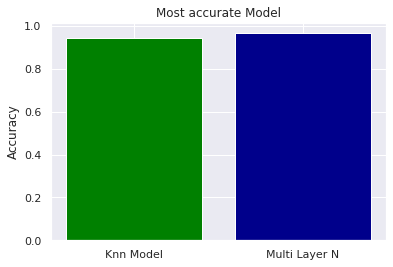

In [550]:
models = ['Knn Model','Multi Layer N']
acc_scores = [0.9425, 0.9660]

plt.bar(models, acc_scores, color=['Green', 'darkblue'])
plt.ylabel("Accuracy")
plt.title("Most accurate Model")
plt.show()